# Arbitrary Value Imputation

this technique was derived from kaggle competition
It consists of replacing NAN by an arbitrary value

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
df_titanic = pd.read_csv("titanic.csv", usecols=['Age', 'Fare', 'Survived'])
df_titanic.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df_titanic.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In this technique we replace NaN values with less than minimum value or greater than max value of that feature. Most common missing values filling them with random sample technique or mean/median/mode.

In [6]:
def impute_nan_arbitrary(df, feature):
    min_value = df[feature].min()
    max_value = df[feature].max()
    
    fillValue = np.random.randint(-max_value, min_value)
    newName = feature + "_arbi"
    
    df[newName] = df[feature].fillna(fillValue)
    return newName

In [7]:
impute_nan_arbitrary(df_titanic, 'Age')

'Age_arbi'

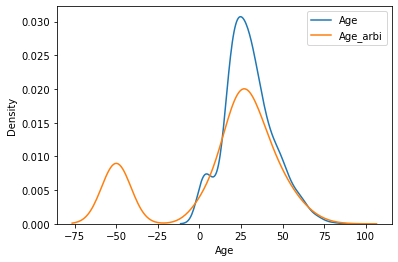

In [9]:
sns.kdeplot('Age', legend='new_Age_mean' ,data=df_titanic)
sns.kdeplot('Age_arbi', legend='new_Age_median' ,data=df_titanic)

plt.legend(['Age',"Age_arbi"])
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Count'>

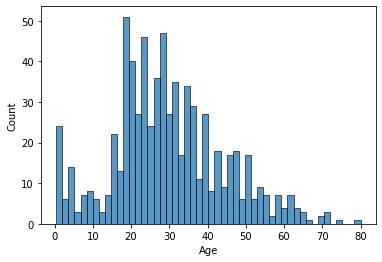

In [10]:
sns.histplot(df_titanic['Age'], bins=50)

<AxesSubplot:xlabel='Age_arbi', ylabel='Count'>

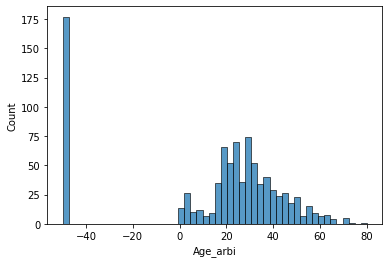

In [12]:
sns.histplot(df_titanic['Age_arbi'], bins=50)

### Advantages

- Easy to implement
- Captures the importance of missingess if there is one

### Disadvantages

- Distorts the original distribution of the variable
- If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution
- Hard to decide which value to use